# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [324]:

# If any of you TAs have workable code for managing
# GZ files, I would appreciate it.  I can't get this crap to work.

# import sys
# try:
#     from CStringIO import StringIO 
# except ImportError:
#     try:
#         from StringIO import StringIO
#     except ImportError:
#         from io import StringIO

In [325]:
# def gzip_decode(data):
#     """gzip encoded data -> unencoded data

#     Decode data using the gzip content encoding as described in RFC 1952
#     """
#     if not gzip:
#         raise NotImplementedError
#     f = StringIO.StringIO(data)
#     gzf = gzip.GzipFile(mode="rb", fileobj=f)
#     try:
#         decoded = gzf.read()
#     except IOError:
#         raise ValueError("invalid data")
#     f.close()
#     gzf.close()
#     return decoded

# ##
# # Return a decoded file-like object for the gzip encoding
# # as described in RFC 1952.
# #
# # @param response A stream supporting a read() method
# # @return a file-like object that the decoded data can be read() from

In [326]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import datetime
import gzip
from pandas.io.json import json_normalize
import pprint as pp
import os
import json

In [327]:

 
# f=gzip.open('current.city.list.json.gz','rb')
# file_content=f.read()
# weathercities=json.load(gzip_decode(file_content))
# pp.pprint(len(weathercities))    
# df = json(weathercities) 
# Load JSON

filepath='current.city.json' #from bulk/openweathermap gz file that I uncompressed with a secondary tool
#note that the encoding is 'latin-1', this is because of non UTF-8 characters in some of the names  
with open(filepath,'r',encoding='latin-1') as data_file:
    weathercities=json.load(data_file)
    
 
df = pd.DataFrame.from_dict(weathercities)#, orient='columns')
# Take 6 data sets
# for i in range(0,5):
def getsample(df):    
    df = df.sample(600)
    return df

#dfs=getsample(df)
#dfs.head()

In [328]:
#dfs1=getsample(df)
#dfs1.head()

In [329]:
dfs2=getsample(df)
dfs2.head()
    
 

,coord,country,geoname,id,langs,name,stat,stations,zoom
8428,"{'lon': 112.97139, 'lat': 34.759998}",CN,"{'cl': 'P', 'code': 'PPL', 'parent': 1808520}",1789897.0,[{'link': 'http://en.wikipedia.org/wiki/Gongyi'}],Gongyi,"{'level': 1.0, 'population': 56033}","[{'id': 7422, 'dist': 84, 'kf': 1}]",9.0
21607,"{'lon': -121.4944, 'lat': 38.58157}",US,"{'cl': 'P', 'code': 'PPLA', 'parent': 5389519}",5389489.0,"[{'bg': 'Ð¡Ð°ÐºÑÐ°Ð¼ÐµÐ½ÑÐ¾'}, {'ca': 'Sacra...",Sacramento,"{'level': 1.0, 'population': 466488}","[{'id': 378, 'dist': 29, 'kf': 1}, {'id': 408,...",7.0
6639,"{'lon': 79.183327, 'lat': 27.5}",IN,"{'cl': 'P', 'code': 'PPL', 'parent': 1253626}",1279023.0,[{'link': 'http://en.wikipedia.org/wiki/Aligan...,Aliganj,"{'level': 1.0, 'population': 26652}",NaN,10.0
11464,"{'lon': -5.74952, 'lat': 37.373009}",ES,"{'cl': 'P', 'code': 'PPL', 'parent': 6361013}",2514288.0,NaN,Mairena del Alcor,"{'level': 1.0, 'population': 20510}","[{'id': 5491, 'dist': 25, 'kf': 1}, {'id': 551...",11.0
19160,"{'lon': -86.105797, 'lat': 33.43594}",US,"{'cl': 'P', 'code': 'PPLA2', 'parent': 4092795}",4092788.0,[{'link': 'http://en.wikipedia.org/wiki/Tallad...,Talladega,"{'level': 1.0, 'population': 15676}","[{'id': 198, 'dist': 49, 'kf': 1}, {'id': 202,...",9.0


In [330]:
# # Import API key
 from api_keys import api_key

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [331]:
# Save config information.
#url = "http://api.openweathermap.org/data/2.5/weather?"
#url ="http://api.openweathermap.org/data/2.5/find?lat=55.5&lon=37.5&cnt=10
# Save config information.
#query_url ="https://api.openweathermap.org/data/2.5/group?id=524901,703448,2643743&units=imperial&appid="+app_key
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
# Build partial query URL 
query_url = f"{url}appid={api_key}&units={units}&q="
#for name in dfs1:
problems =[]

counter = 0
indxcnt = 0
#Create a set of lists for 
#Each item

ids=[]    #city id needed to merge with city.current list 
maxts=[]  #max temp for city from JSON response
mints=[]  #min temp for city from JSON response
cloudy=[] #percent cloudiness for city from JSON response
humids=[] #average humidity city from JSON response
speeds=[] #average wind speed city from JSON response
lats=[]   #lat stored in JSON from JSON response
longs=[]  #long stored in JSON for city from JSON response
sunrises=[] #unix timestamp for sunrise
sunsets=[] #unix timestamp for sunrize

#now, iterate through the panda list of cities
#and construct lists from the JSON responses
#of the items we want to track

for index,row in dfs2.T.iteritems():
    try:
        #print('-------------'+ row['name'] +'--------------')
        response = requests.get(query_url + row['name']).json()
        ids.append(response['id'])
        lats.append(response['coord']['lat'])
        longs.append(response['coord']['lon'])
        maxts.append(response['main']["temp_max"])
        mints.append(response['main']["temp_min"])
        humids.append(response["main"]["humidity"])
        speeds.append(response["wind"]["speed"])         
        cloudy.append(response["clouds"]["all"] )
        sunrises.append(response["sys"]["sunrise"])
        sunsets.append(response["sys"]["sunset"])
        indxcnt+=1 # count how many successful passes we have 
        if indxcnt==500:
             break
    except:
        problems.append(row['name'])
        counter+=1 # count failures
        continue #loop
#end for

### Convert Lists to a Dataframe
* Convert lists to dataframe from dictionary
* Merge JSON sourced Dataframe with Sample Dataframe
* Write CSV File of Dataframe


In [332]:
# build a dictionary of the lists, with name and data for each column
dict={'id':ids,
      'latf':lats,'lngf':longs,
      'maxtf':maxts,'mints':mints,
      'humidf':humids,'speedf':speeds,
      'cloudf':cloudy,
      'sunrise':sunrises,'sunset':sunsets} # a dictionary of lists

#use panda to create a DATAFRAME from the dictionary
dfilt = pd.DataFrame(dict) #, columns = ['Indexf', 'latf','lngf','maxtf','humidf','speedf','cloudf']) 
weather_data = pd.merge(dfs2,dfilt, on=['id']) #default inner join will give us only the ids common to both, which is what we want
weather_data['Daylight']=(weather_data['sunset']-weather_data['sunrise'])/3600 #hours of daylight
# Output File (CSV)

output_data_file = "output_data/cities.csv"
export_csv = df.to_csv (r'weatherdataforcities.csv', index = None, header=True)
export_csv = weather_data.to_csv (r'weatherdatarandomlyselected.csv', index = None, header=True) 
# 
print("Problems encountered "+ str(counter)+ ' of ' + str(indxcnt+counter))
weather_data.head()
 

Problems encountered 3 of 503


,coord,country,geoname,id,langs,name,stat,stations,zoom,latf,lngf,maxtf,mints,humidf,speedf,cloudf,sunrise,sunset,Daylight
0,"{'lon': 112.97139, 'lat': 34.759998}",CN,"{'cl': 'P', 'code': 'PPL', 'parent': 1808520}",1789897.0,[{'link': 'http://en.wikipedia.org/wiki/Gongyi'}],Gongyi,"{'level': 1.0, 'population': 56033}","[{'id': 7422, 'dist': 84, 'kf': 1}]",9.0,34.75,112.98,99.73,99.73,34,6.38,87,1563744604,1563795514,14.141667
1,"{'lon': -121.4944, 'lat': 38.58157}",US,"{'cl': 'P', 'code': 'PPLA', 'parent': 5389519}",5389489.0,"[{'bg': 'Ð¡Ð°ÐºÑÐ°Ð¼ÐµÐ½ÑÐ¾'}, {'ca': 'Sacra...",Sacramento,"{'level': 1.0, 'population': 466488}","[{'id': 378, 'dist': 29, 'kf': 1}, {'id': 408,...",7.0,38.58,-121.49,80.01,68.00,44,5.82,1,1563713889,1563765972,14.467500
2,"{'lon': 79.183327, 'lat': 27.5}",IN,"{'cl': 'P', 'code': 'PPL', 'parent': 1253626}",1279023.0,[{'link': 'http://en.wikipedia.org/wiki/Aligan...,Aliganj,"{'level': 1.0, 'population': 26652}",NaN,10.0,27.49,79.17,100.09,100.09,39,6.53,42,1563753655,1563802693,13.621667
3,"{'lon': -5.74952, 'lat': 37.373009}",ES,"{'cl': 'P', 'code': 'PPL', 'parent': 6361013}",2514288.0,NaN,Mairena del Alcor,"{'level': 1.0, 'population': 20510}","[{'id': 5491, 'dist': 25, 'kf': 1}, {'id': 551...",11.0,37.37,-5.75,75.99,71.60,73,1.48,0,1563772731,1563824379,14.346667
4,"{'lon': -86.105797, 'lat': 33.43594}",US,"{'cl': 'P', 'code': 'PPLA2', 'parent': 4092795}",4092788.0,[{'link': 'http://en.wikipedia.org/wiki/Tallad...,Talladega,"{'level': 1.0, 'population': 15676}","[{'id': 198, 'dist': 49, 'kf': 1}, {'id': 202,...",9.0,33.44,-86.11,77.00,71.01,88,4.70,40,1563792589,1563843096,14.029722


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Longitude Plot

In [333]:
import datetime
now = datetime.datetime.now() 
DayofAnalysis= (now.strftime("%Y-%m-%d"))
def drawlatvslong(ax):
    # Build a scatter plot for each data type
    ax.scatter(weather_data["lngf"], weather_data["latf"], marker="o")

    # Incorporate the other graph properties
    plt.title("City Latitude vs. Longitude - Station Map" ,fontsize=15)
    plt.xlabel("Longitude °")
    plt.ylabel("Latitude °")
    plt.ylim(-60,80) # plt.ylim(-60,80)
    plt.xlim(-180,180)
    plt.grid(True)
    #plt.tight_layout()
    # Save the figure
    plt.savefig("CityLatvsLong.png")
    # Show plot
    # plt.show()
    
 

#### Latitude vs. Temperature Plot

In [334]:
# Build a scatter plot for each data type
def latvstemp(ax):
    ax.scatter(weather_data["maxtf"], weather_data["latf"], marker="o",color='r')

    # Incorporate the other graph properties
    plt.title("City Latitude vs. Max Temperature "+ DayofAnalysis,fontsize=15,color='b')
    plt.xlabel("Max Temperature (F°)")
    plt.ylabel("Latitude °")
    plt.ylim(-60,80) # plt.ylim(-60,80)
    plt.xlim(-40,130)
    plt.grid(True)
    #plt.tight_layout()

    # Save the figure
    plt.savefig("CityLatvsMaxTemp.png")

    # Show plot
    #plt.show()

#### Latitude vs. Humidity Plot

In [335]:
# Build a scatter plot for each data type
def latvshumidity(ax):
    ax.scatter(weather_data["humidf"], weather_data["latf"], marker="o",color='b')

    # Incorporate the other graph properties
    plt.title("City Latitude vs. Humidity "+ DayofAnalysis,fontsize=15)
    plt.xlabel("Humidity %")
    plt.ylabel("Latitude °")
    plt.xlim(0,100)
    plt.ylim(-50,80)
    plt.grid(True)
    #plt.tight_layout()

    # Save the figure
    plt.savefig("CityLatvsHumidity.png")

    # Show plot
    #plt.show()

#### Latitude vs. Cloudiness Plot

In [336]:
# Build a scatter plot for each data type
def latvsclouds(ax):
    ax.scatter(weather_data["cloudf"], weather_data["latf"], marker="o",color='g')
    # Incorporate the other graph properties
    plt.title("City Latitude vs. Cloudiness "+ DayofAnalysis,fontsize=15)
    plt.xlabel("Cloudiness")
    plt.ylabel("Latitude")
    plt.xlim(0,100)
    plt.ylim(-50,80)
    plt.grid(True)
    #plt.tight_layout()
    # Save the figure
    plt.savefig("CityLatvsCloudiness.png")

    # Show plot
    #plt.show()

#### Latitude vs. Wind Speed Plot

In [337]:
# Build a scatter plot for each data type
def latvswind(ax):
    ax.scatter(weather_data["speedf"], weather_data["latf"], marker="o",color='y')
    # Incorporate the other graph properties
    plt.title("City Latitude vs. Windspeed "+ DayofAnalysis,fontsize=15)
    plt.xlabel("Windspeed")
    plt.ylabel("Latitude")
    plt.xlim(0,100)
    plt.ylim(-50,80)
    plt.grid(True)
    #plt.tight_layout()
    # Save the figure
    plt.savefig("CityLatvsCloudiness.png")

    # Show plot
    #plt.show()

In [338]:
def scatterthis(ax,df,Xserie,Yserie,Plottitle,Xlabel,Ylabel,xlim,ylim,colorcode,filename):
    ax.scatter(df[Xserie], df[Yserie], marker="o",color=colorcode)
    # Incorporate the other graph properties
    plt.title(Plottitle,fontsize=15)
    plt.xlabel(Xlabel)
    plt.ylabel(Ylabel)
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.grid(True)
    plt.tight_layout()
    # Save the figure
    plt.savefig(filename)


**This will sets up a figure size of 20 wide by 11 width
The figure space is divided into 3cols by two rows
the subplots are distributed using the subplot2grid
functionality**

In [339]:
def drawfigure():
    fig= plt.figure(figsize=(21,14))
    from matplotlib import style
 

    #style.use('fivethirtyeight')
    #print(plt.style.available)
    frows=2
    fcols=3
    # Divide the figure into a 2x1 grid, and give me the first section
    ax1 = plt.subplot2grid((frows,fcols),(0,0),rowspan=1,colspan=2) 
    drawlatvslong(ax1)
    ax2 = plt.subplot2grid((frows,fcols),(1,2),rowspan=1,colspan=1) 
    latvstemp(ax2)
    ax3 = plt.subplot2grid((frows,fcols),(0,2),rowspan=1,colspan=1)
    latvshumidity(ax3)
    ax4 = plt.subplot2grid((frows,fcols),(1,0),rowspan=1,colspan=1) 
    latvsclouds(ax4)
    ax5 = plt.subplot2grid((frows,fcols),(1,1),rowspan=1,colspan=1) 
    latvswind(ax5)
    #ax6 = plt.subplot2grid((frows,fcols),(1,2),rowspan=1,colspan=1) 
    fig.suptitle("Graphic Data Analyis of Weather for "+DayofAnalysis,fontsize=20)
    fig.savefig('Allgraphs')
    plt.show()

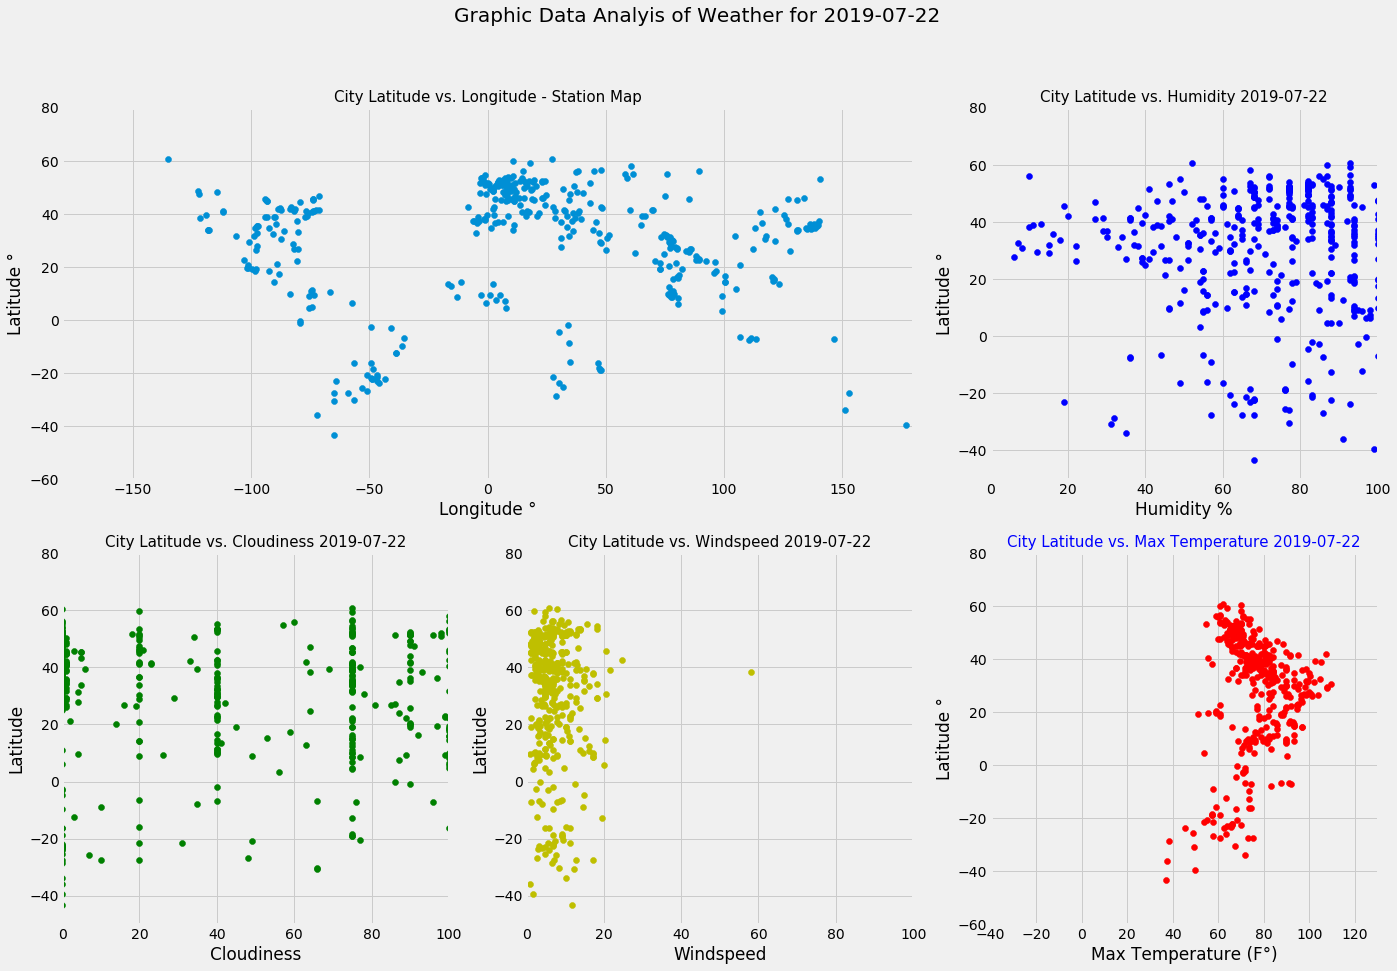

In [340]:
drawfigure()